In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [5]:
image = cv2.imread("/home/nalin/Downloads/bmp_13.webp")

## We have divided ass_3 in two parts , we performed oprations for both gray and rgb images . 1st set is of gray and second is of rgb .

(1599, 2400, 3)

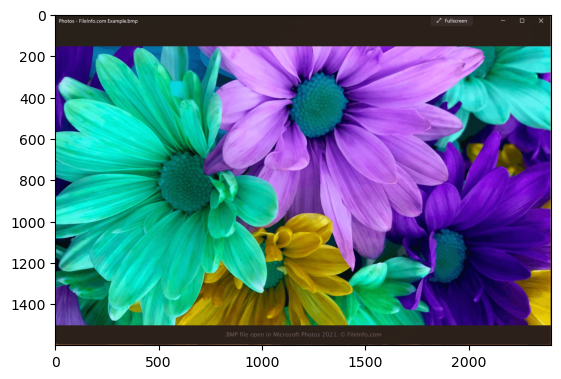

In [6]:
plt.imshow(image)
image.shape

In [7]:
downsampled_image = image[::10, ::10]

(160, 240, 3)

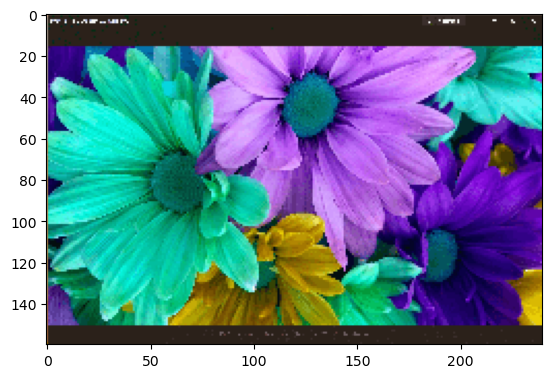

In [8]:
plt.imshow(downsampled_image)
downsampled_image.shape


In [9]:
def nearest_neighbor_interpolation(image, scale_factor):
    original_height, original_width = image.shape
    
    new_height = int(original_height * scale_factor)
    new_width = int(original_width * scale_factor)
    
    new_image = np.zeros((new_height, new_width), dtype=image.dtype)
    
    for i in range(new_height):
        for j in range(new_width):
            x = round(i / scale_factor)
            y = round(j / scale_factor)
            
            x = min(x, original_height - 1)
            y = min(y, original_width - 1)
            
            new_image[i, j] = image[x, y]
    
    return new_image
image = cv2.imread("/home/nalin/Downloads/bmp_13.webp", cv2.IMREAD_GRAYSCALE)

scale_factor = 2
resized_image_int = nearest_neighbor_interpolation(image, scale_factor)

In [10]:
resized_image_int.shape

(3198, 4800)

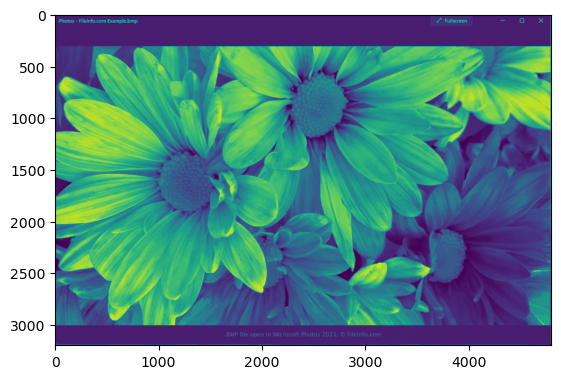

In [11]:
plt.imshow(resized_image_int)

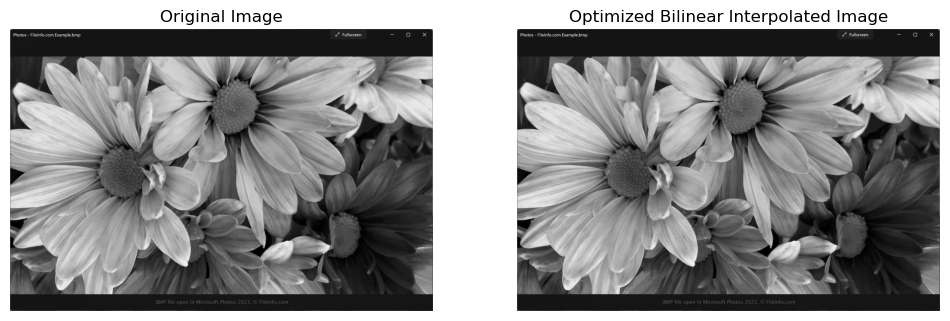

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def bilinear_interpolation_optimized(img, scale_x, scale_y):
    original_height, original_width = img.shape
    new_height, new_width = int(original_height * scale_y), int(original_width * scale_x)
    x = np.arange(new_width) / scale_x
    y = np.arange(new_height) / scale_y
    x1 = np.floor(x).astype(int)
    y1 = np.floor(y).astype(int)
    x2 = np.clip(x1 + 1, 0, original_width - 1)
    y2 = np.clip(y1 + 1, 0, original_height - 1)
    X, Y = np.meshgrid(x1, y1)
    X2, Y2 = np.meshgrid(x2, y2)
    Dx, Dy = np.meshgrid(x - x1, y - y1)
    Q11 = img[Y, X]
    Q21 = img[Y, X2]
    Q12 = img[Y2, X]
    Q22 = img[Y2, X2]
    
    new_img = (1 - Dx) * (1 - Dy) * Q11 + Dx * (1 - Dy) * Q21 + \
              (1 - Dx) * Dy * Q12 + Dx * Dy * Q22
    
    return new_img.astype(np.uint8)

image = cv2.imread('/home/nalin/Downloads/bmp_13.webp', cv2.IMREAD_GRAYSCALE)

scale_x, scale_y = 2, 2  
resized_image_bil = bilinear_interpolation_optimized(image, scale_x, scale_y)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(resized_image_bil, cmap='gray')
plt.title('Optimized Bilinear Interpolated Image')
plt.axis('off')

plt.show()



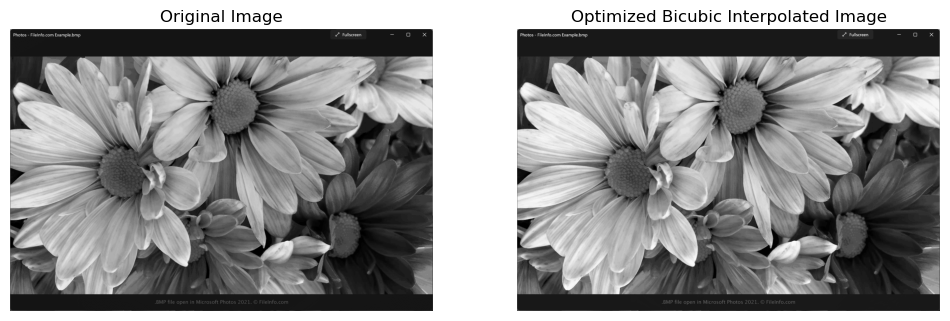

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cubic interpolation function
def cubic(x):
    abs_x = np.abs(x)
    abs_x2 = abs_x ** 2
    abs_x3 = abs_x ** 3

    # Cubic interpolation formula
    f = np.where(abs_x <= 1, 
                 1.5 * abs_x3 - 2.5 * abs_x2 + 1,
                 np.where(abs_x <= 2, 
                          -0.5 * abs_x3 + 2.5 * abs_x2 - 4 * abs_x + 2, 
                          0))
    return f
def bicubic_interpolation_optimized(img, scale_x, scale_y):
    original_height, original_width = img.shape

    new_height, new_width = int(original_height * scale_y), int(original_width * scale_x)

    
    new_img = np.zeros((new_height, new_width), dtype=np.uint8)
    x = np.arange(new_width) / scale_x
    y = np.arange(new_height) / scale_y
    x1 = np.floor(x).astype(int)
    y1 = np.floor(y).astype(int)

    x2 = np.clip(x1 + 1, 0, original_width - 1)
    y2 = np.clip(y1 + 1, 0, original_height - 1)
    dx = x - x1
    dy = y - y1

    X1, Y1 = np.meshgrid(x1, y1)
    X2, Y2 = np.meshgrid(x2, y2)
    DX, DY = np.meshgrid(dx, dy)

    Q11 = img[Y1, X1]
    Q21 = img[Y1, X2]
    Q12 = img[Y2, X1]
    Q22 = img[Y2, X2]

    weight_x1 = cubic(DX)
    weight_x2 = cubic(1 - DX)
    weight_y1 = cubic(DY)
    weight_y2 = cubic(1 - DY)

    new_img = (weight_x1 * weight_y1 * Q11 +
               weight_x2 * weight_y1 * Q21 +
               weight_x1 * weight_y2 * Q12 +
               weight_x2 * weight_y2 * Q22)
    
    return np.clip(new_img, 0, 255).astype(np.uint8)

image = cv2.imread('/home/nalin/Downloads/bmp_13.webp', cv2.IMREAD_GRAYSCALE)

scale_x, scale_y = 2, 2 

resized_image_bic = bicubic_interpolation_optimized(image, scale_x, scale_y)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(resized_image_bic, cmap='gray')
plt.title('Optimized Bicubic Interpolated Image')
plt.axis('off')

plt.show()


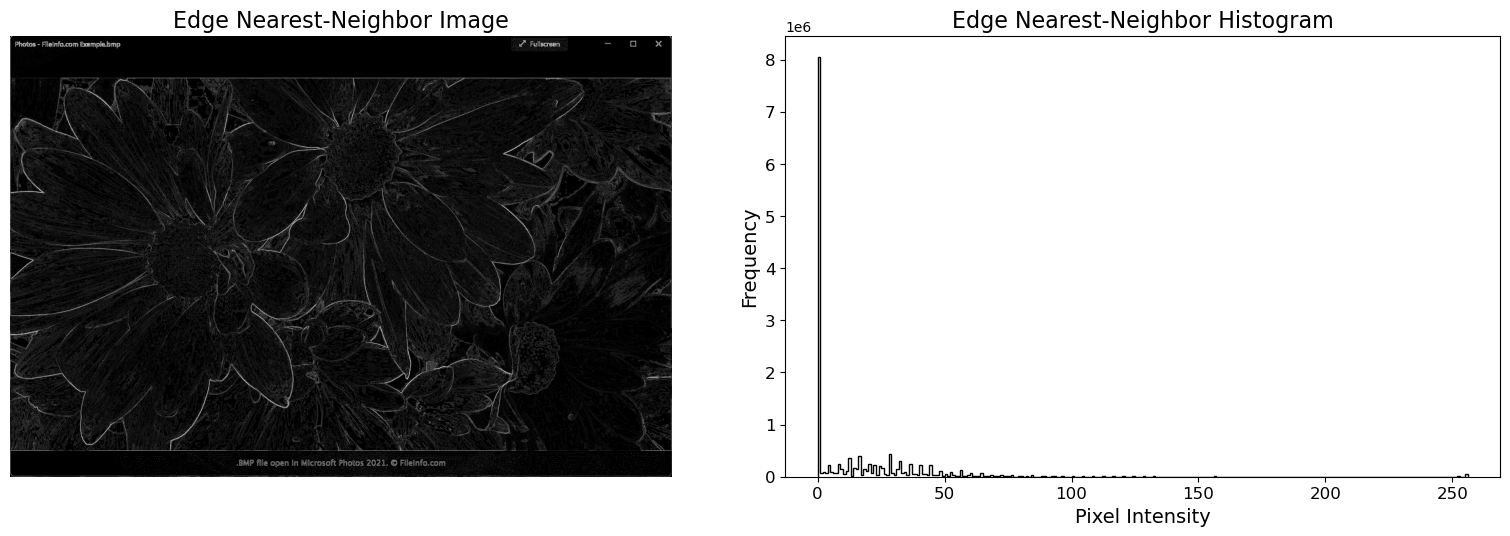

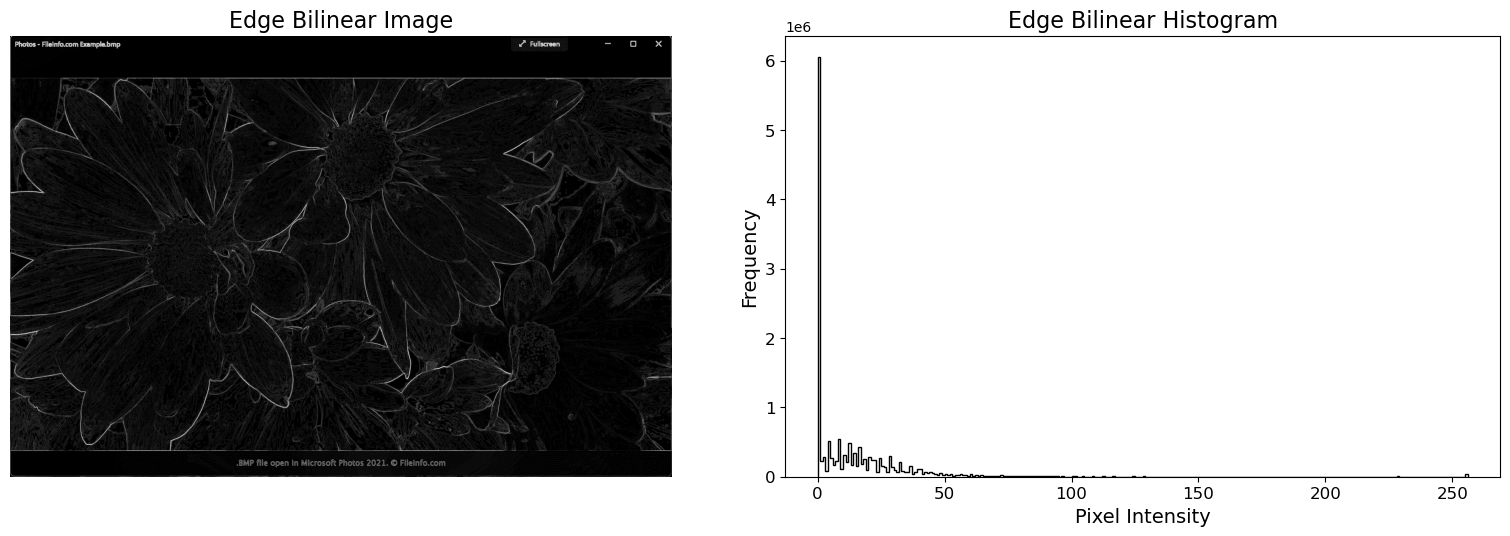

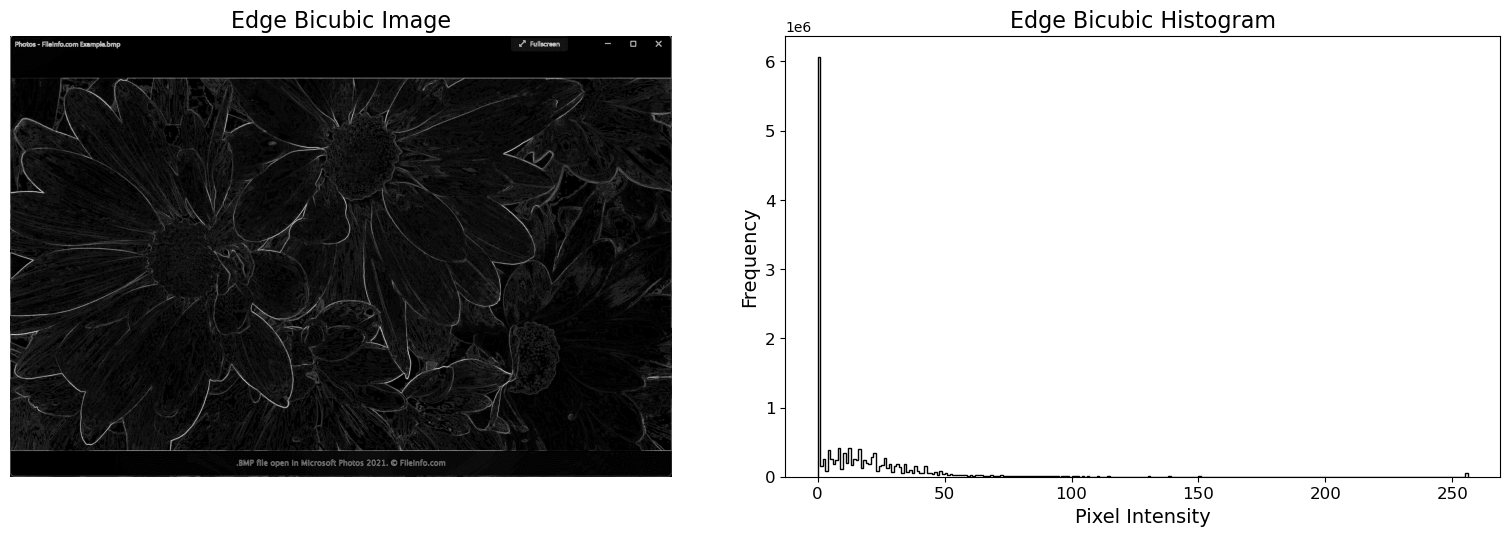

Nearest-Neighbor Image Dimensions: (3198, 4800)
Bilinear Image Dimensions: (3198, 4800)
Bicubic Image Dimensions: (3198, 4800)


In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_edge_detection(image):
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  
    sobel_edge = np.sqrt(sobel_x**2 + sobel_y**2)
    sobel_edge = np.uint8(np.clip(sobel_edge, 0, 255))  

    return sobel_edge

def plot_image_and_histogram(image, title):
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    axs[0].imshow(image, cmap='gray')
    axs[0].set_title(f'{title} Image', fontsize=16)
    axs[0].axis('off')

    axs[1].hist(image.ravel(), bins=256, range=[0, 256], color='black', histtype='step')
    axs[1].set_title(f'{title} Histogram', fontsize=16)
    axs[1].set_xlabel('Pixel Intensity', fontsize=14)
    axs[1].set_ylabel('Frequency', fontsize=14)
    axs[1].tick_params(axis='both', which='major', labelsize=12)

    plt.tight_layout(pad=3.0)
    plt.show()

edge_nearest = apply_edge_detection(resized_image_int)
edge_bilinear = apply_edge_detection(resized_image_bil)
edge_bicubic = apply_edge_detection(resized_image_bic)

plot_image_and_histogram(edge_nearest, 'Edge Nearest-Neighbor')
plot_image_and_histogram(edge_bilinear, 'Edge Bilinear')
plot_image_and_histogram(edge_bicubic, 'Edge Bicubic')

print("Nearest-Neighbor Image Dimensions:", edge_nearest.shape)
print("Bilinear Image Dimensions:", edge_bilinear.shape)
print("Bicubic Image Dimensions:", edge_bicubic.shape)


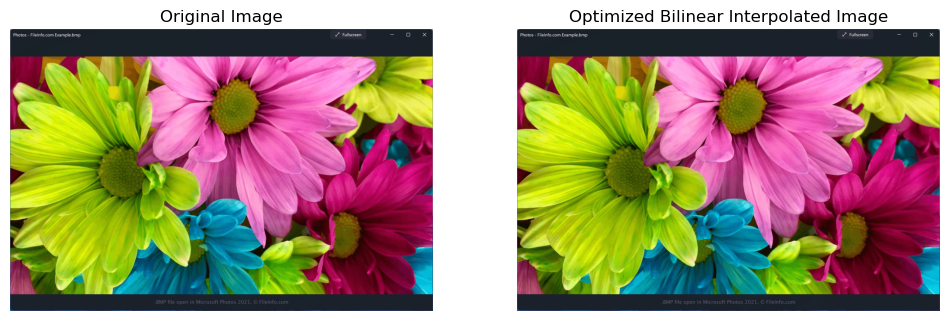

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def bilinear_interpolation_optimized_color(img, scale_x, scale_y):
    original_height, original_width, channels = img.shape
    
    new_height, new_width = int(original_height * scale_y), int(original_width * scale_x)
    
    x = np.arange(new_width) / scale_x
    y = np.arange(new_height) / scale_y
    
    x1 = np.floor(x).astype(int)
    y1 = np.floor(y).astype(int)
    
    x2 = np.clip(x1 + 1, 0, original_width - 1)
    y2 = np.clip(y1 + 1, 0, original_height - 1)
    
    X, Y = np.meshgrid(x1, y1)
    X2, Y2 = np.meshgrid(x2, y2)
    Dx, Dy = np.meshgrid(x - x1, y - y1)
    
    new_img = np.zeros((new_height, new_width, channels), dtype=np.uint8)
    
    for c in range(channels):
        Q11 = img[Y, X, c]
        Q21 = img[Y, X2, c]
        Q12 = img[Y2, X, c]
        Q22 = img[Y2, X2, c]
        
        new_img[..., c] = (1 - Dx) * (1 - Dy) * Q11 + Dx * (1 - Dy) * Q21 + \
                          (1 - Dx) * Dy * Q12 + Dx * Dy * Q22
    
    return new_img

image = cv2.imread('/home/nalin/Downloads/bmp_13.webp')

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

scale_x, scale_y = 2, 2  

resized_image_bil = bilinear_interpolation_optimized_color(image_rgb, scale_x, scale_y)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(resized_image_bil)
plt.title('Optimized Bilinear Interpolated Image')
plt.axis('off')

plt.show()


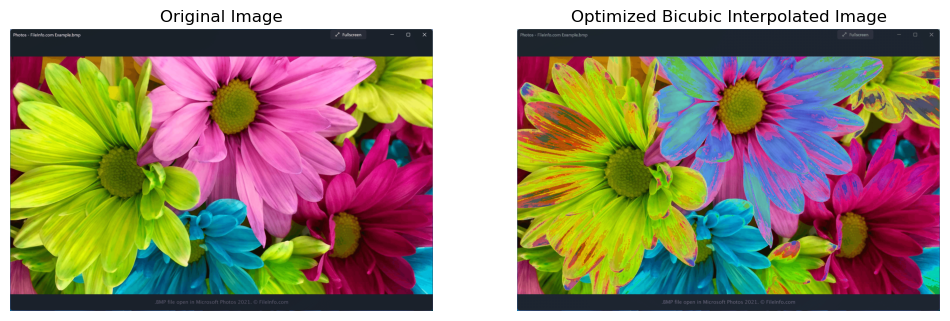

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def cubic(x):
    abs_x = np.abs(x)
    abs_x2 = abs_x ** 2
    abs_x3 = abs_x ** 3

    f = np.where(abs_x <= 1, 
                 1.5 * abs_x3 - 2.5 * abs_x2 + 1,
                 np.where(abs_x <= 2, 
                          -0.5 * abs_x3 + 2.5 * abs_x2 - 4 * abs_x + 2, 
                          0))
    return f

def bicubic_interpolation_optimized_color(img, scale_x, scale_y):
    original_height, original_width, channels = img.shape

    new_height, new_width = int(original_height * scale_y), int(original_width * scale_x)

    new_img = np.zeros((new_height, new_width, channels), dtype=np.uint8)

    x = np.arange(new_width) / scale_x
    y = np.arange(new_height) / scale_y
    
    x1 = np.floor(x).astype(int)
    y1 = np.floor(y).astype(int)

    x2 = np.clip(x1 + 1, 0, original_width - 1)
    y2 = np.clip(y1 + 1, 0, original_height - 1)

    dx = x - x1
    dy = y - y1

    X1, Y1 = np.meshgrid(x1, y1)
    X2, Y2 = np.meshgrid(x2, y2)
    DX, DY = np.meshgrid(dx, dy)

    new_img = np.zeros((new_height, new_width, channels), dtype=np.uint8)

    for c in range(channels):
        Q11 = img[Y1, X1, c]
        Q21 = img[Y1, X2, c]
        Q12 = img[Y2, X1, c]
        Q22 = img[Y2, X2, c]

        weight_x1 = cubic(DX)
        weight_x2 = cubic(1 - DX)
        weight_y1 = cubic(DY)
        weight_y2 = cubic(1 - DY)

        new_img[..., c] = (weight_x1 * weight_y1 * Q11 +
                           weight_x2 * weight_y1 * Q21 +
                           weight_x1 * weight_y2 * Q12 +
                           weight_x2 * weight_y2 * Q22)
    
    return np.clip(new_img, 0, 255).astype(np.uint8)

image = cv2.imread('/home/nalin/Downloads/bmp_13.webp')

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

scale_x, scale_y = 2, 2  
resized_image_bic = bicubic_interpolation_optimized_color(image_rgb, scale_x, scale_y)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(resized_image_bic)
plt.title('Optimized Bicubic Interpolated Image')
plt.axis('off')

plt.show()


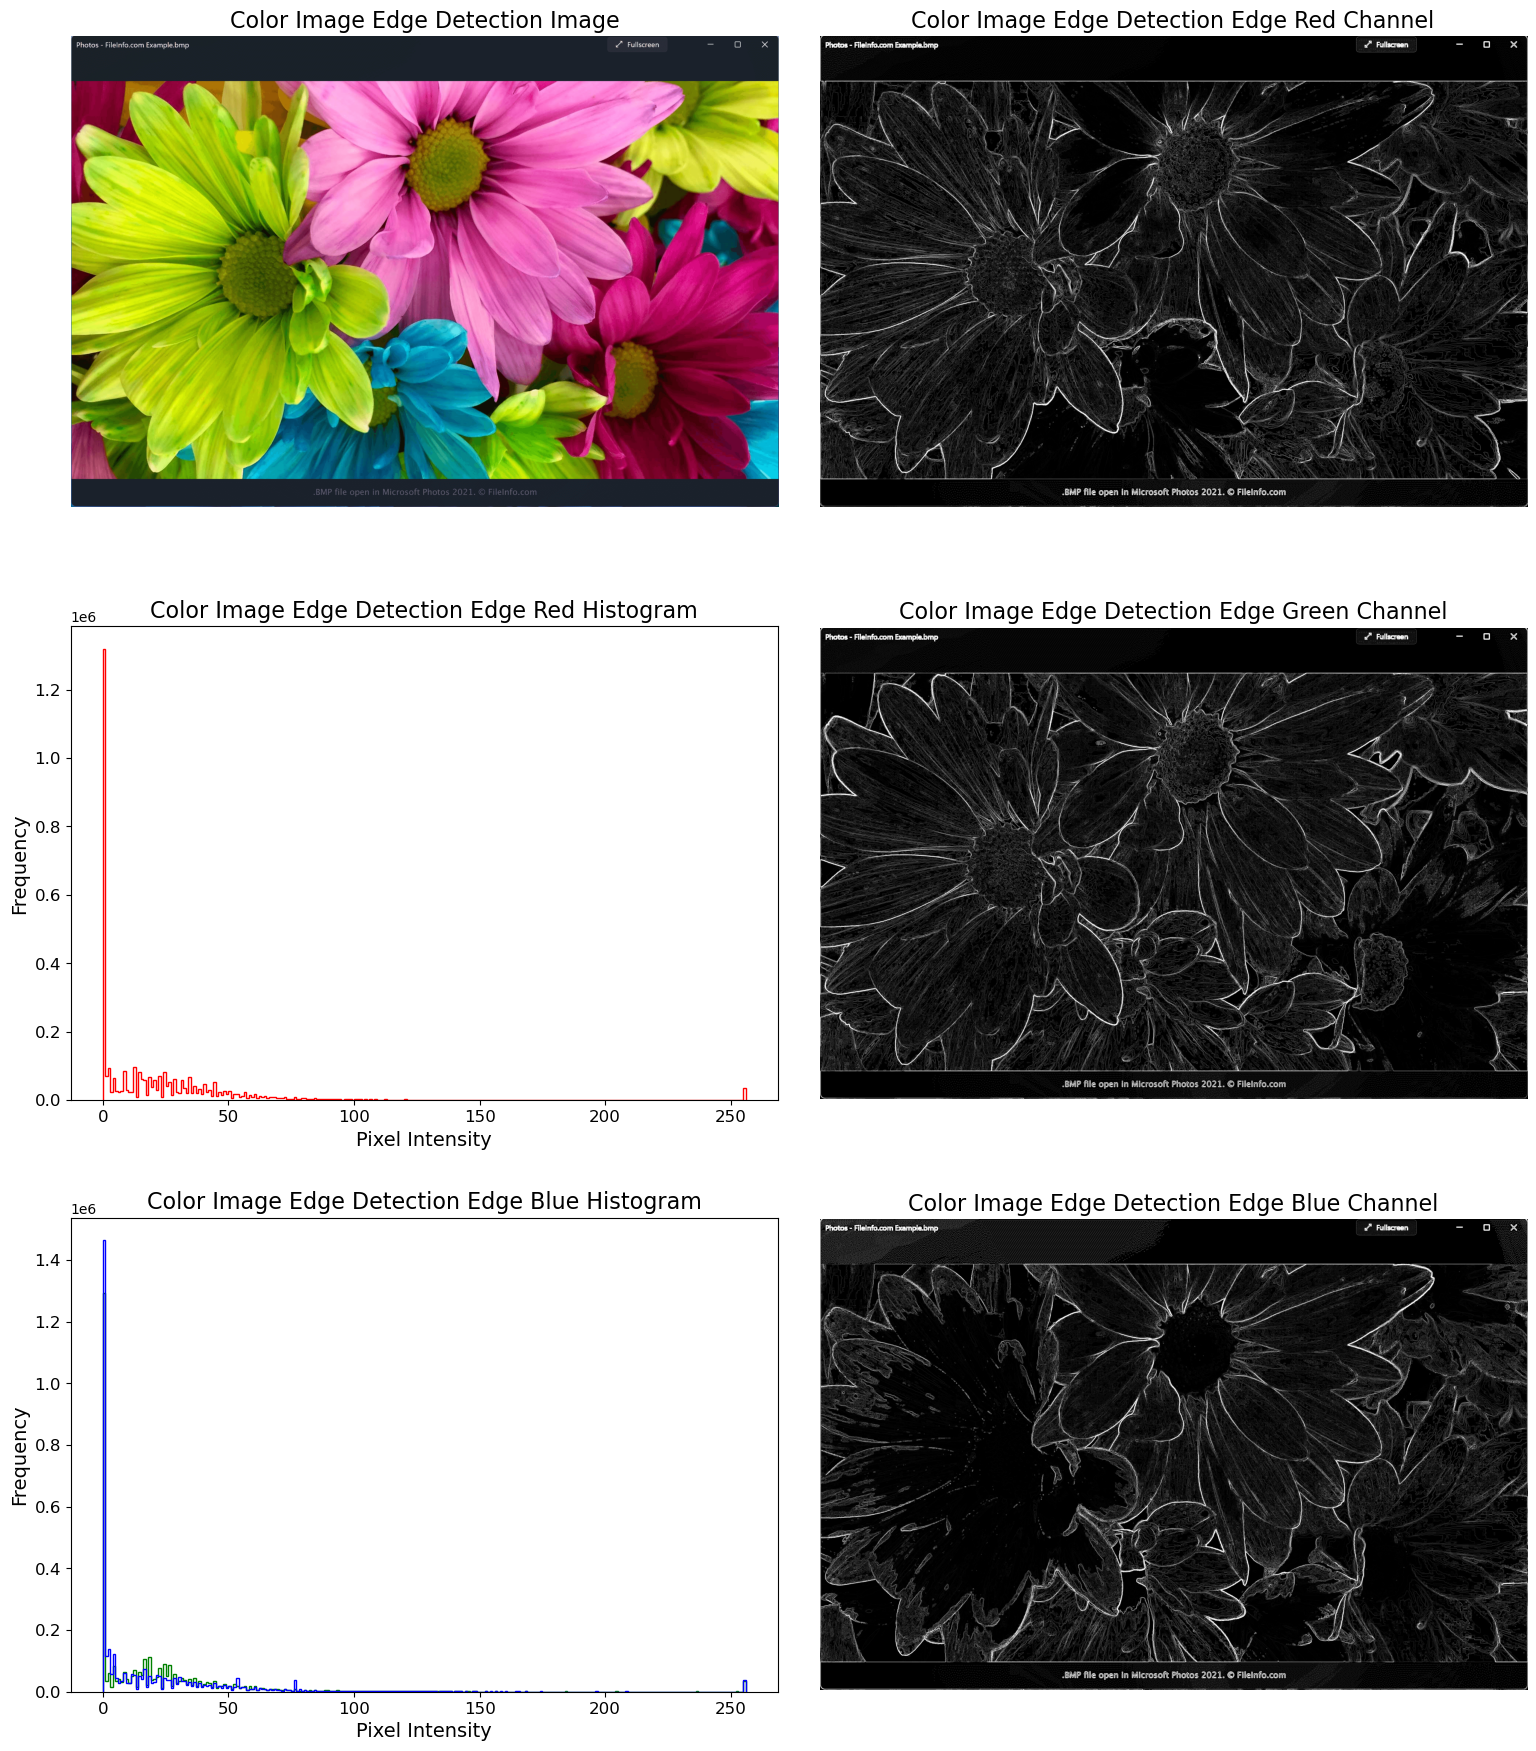

Edge Red Channel Dimensions: (1599, 2400)
Edge Green Channel Dimensions: (1599, 2400)
Edge Blue Channel Dimensions: (1599, 2400)


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_edge_detection_color(image):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    edge_r = np.zeros_like(image_rgb[:, :, 0], dtype=np.uint8)
    edge_g = np.zeros_like(image_rgb[:, :, 1], dtype=np.uint8)
    edge_b = np.zeros_like(image_rgb[:, :, 2], dtype=np.uint8)
    
    for c in range(3): 
        sobel_x = cv2.Sobel(image_rgb[:, :, c], cv2.CV_64F, 1, 0, ksize=3)
        sobel_y = cv2.Sobel(image_rgb[:, :, c], cv2.CV_64F, 0, 1, ksize=3)
        sobel_edge = np.sqrt(sobel_x**2 + sobel_y**2)
        edge_map = np.uint8(np.clip(sobel_edge, 0, 255))
        
        if c == 0:
            edge_r = edge_map
        elif c == 1:
            edge_g = edge_map
        else:
            edge_b = edge_map
    
    return edge_r, edge_g, edge_b

def plot_image_and_histogram_color(image, edge_r, edge_g, edge_b, title):
    fig, axs = plt.subplots(3, 2, figsize=(16, 18))
    
    axs[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[0, 0].set_title(f'{title} Image', fontsize=16)
    axs[0, 0].axis('off')
    
    axs[0, 1].imshow(edge_r, cmap='gray')
    axs[0, 1].set_title(f'{title} Edge Red Channel', fontsize=16)
    axs[0, 1].axis('off')

    axs[1, 1].imshow(edge_g, cmap='gray')
    axs[1, 1].set_title(f'{title} Edge Green Channel', fontsize=16)
    axs[1, 1].axis('off')

    axs[2, 1].imshow(edge_b, cmap='gray')
    axs[2, 1].set_title(f'{title} Edge Blue Channel', fontsize=16)
    axs[2, 1].axis('off')

    axs[1, 0].hist(edge_r.ravel(), bins=256, range=[0, 256], color='red', histtype='step')
    axs[1, 0].set_title(f'{title} Edge Red Histogram', fontsize=16)
    axs[1, 0].set_xlabel('Pixel Intensity', fontsize=14)
    axs[1, 0].set_ylabel('Frequency', fontsize=14)
    axs[1, 0].tick_params(axis='both', which='major', labelsize=12)

    axs[2, 0].hist(edge_g.ravel(), bins=256, range=[0, 256], color='green', histtype='step')
    axs[2, 0].set_title(f'{title} Edge Green Histogram', fontsize=16)
    axs[2, 0].set_xlabel('Pixel Intensity', fontsize=14)
    axs[2, 0].set_ylabel('Frequency', fontsize=14)
    axs[2, 0].tick_params(axis='both', which='major', labelsize=12)

    axs[2, 0].hist(edge_b.ravel(), bins=256, range=[0, 256], color='blue', histtype='step')
    axs[2, 0].set_title(f'{title} Edge Blue Histogram', fontsize=16)
    axs[2, 0].set_xlabel('Pixel Intensity', fontsize=14)
    axs[2, 0].set_ylabel('Frequency', fontsize=14)
    axs[2, 0].tick_params(axis='both', which='major', labelsize=12)

    plt.tight_layout(pad=3.0)
    plt.show()

image = cv2.imread('/home/nalin/Downloads/bmp_13.webp')

edge_r, edge_g, edge_b = apply_edge_detection_color(image)

plot_image_and_histogram_color(image, edge_r, edge_g, edge_b, 'Color Image Edge Detection')

print("Edge Red Channel Dimensions:", edge_r.shape)
print("Edge Green Channel Dimensions:", edge_g.shape)
print("Edge Blue Channel Dimensions:", edge_b.shape)
